In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
# Get the stock quote
df = pd.read_csv('0050.TW.csv')
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-01,139.050003,140.800003,138.850006,140.449997,140.449997,8239515
2022-03-02,140.000000,140.100006,139.199997,139.649994,139.649994,6131154
2022-03-03,140.500000,140.800003,139.850006,139.949997,139.949997,4438868
2022-03-04,138.500000,138.850006,137.949997,138.449997,138.449997,12599177
2022-03-07,136.899994,136.899994,133.750000,134.000000,134.000000,52044419
...,...,...,...,...,...,...
2023-02-21,119.000000,119.099998,118.550003,118.949997,118.949997,4443038
2023-02-22,117.500000,117.750000,117.099998,117.650002,117.650002,10887622
2023-02-23,117.949997,119.800003,117.949997,119.400002,119.400002,6197695


In [12]:
df.shape

(245, 6)

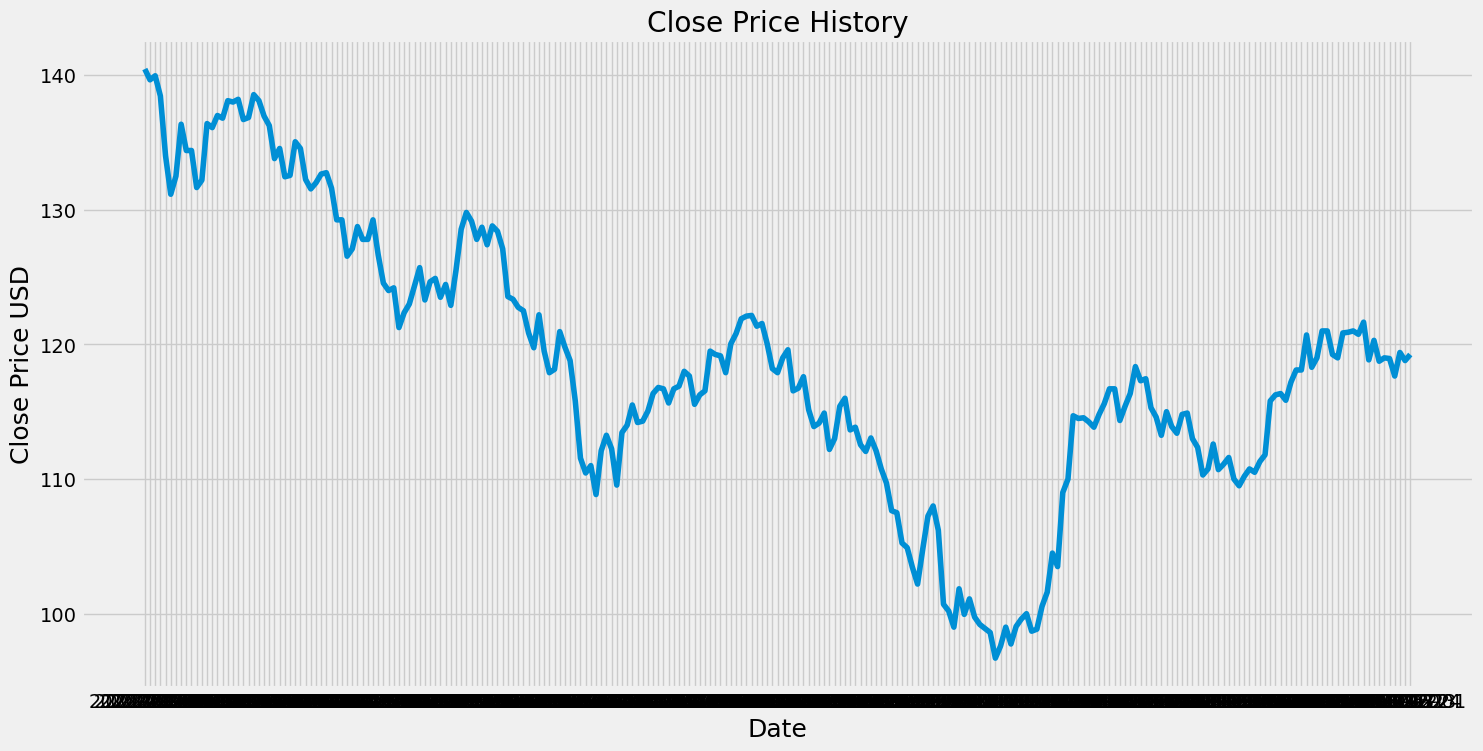

In [15]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [16]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

196

In [17]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.        ],
       [0.98171422],
       [0.98857143],
       [0.95428571],
       [0.8525715 ],
       [0.7874285 ],
       [0.81828578],
       [0.90628592],
       [0.86171422],
       [0.86171422],
       [0.79885707],
       [0.81142857],
       [0.9074285 ],
       [0.90057163],
       [0.92114293],
       [0.91657157],
       [0.94628592],
       [0.94400007],
       [0.94857143],
       [0.91428571],
       [0.91771449],
       [0.95657157],
       [0.94628592],
       [0.92      ],
       [0.90400007],
       [0.84800014],
       [0.86514299],
       [0.81714286],
       [0.81942871],
       [0.87657157],
       [0.86514299],
       [0.8125715 ],
       [0.79657157],
       [0.80685721],
       [0.82171422],
       [0.82400007],
       [0.79771449],
       [0.74400007],
       [0.74400007],
       [0.68228585],
       [0.69485717],
       [0.7325715 ],
       [0.71085728],
       [0.71085728],
       [0.74400007],
       [0.68457154],
       [0.63657157],
       [0.624

In [19]:
# Create the training dataset
# Create the scaled training data set
train_data = scaled_data[0: training_data_len, :]

# Split the data into x_train and y_train datasets
x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([1.        , 0.98171422, 0.98857143, 0.95428571, 0.8525715 ,
       0.7874285 , 0.81828578, 0.90628592, 0.86171422, 0.86171422,
       0.79885707, 0.81142857, 0.9074285 , 0.90057163, 0.92114293,
       0.91657157, 0.94628592, 0.94400007, 0.94857143, 0.91428571,
       0.91771449, 0.95657157, 0.94628592, 0.92      , 0.90400007,
       0.84800014, 0.86514299, 0.81714286, 0.81942871, 0.87657157,
       0.86514299, 0.8125715 , 0.79657157, 0.80685721, 0.82171422,
       0.82400007, 0.79771449, 0.74400007, 0.74400007, 0.68228585,
       0.69485717, 0.7325715 , 0.71085728, 0.71085728, 0.74400007,
       0.68457154, 0.63657157, 0.62400007, 0.62857143, 0.56114293,
       0.58628574, 0.60114293, 0.63200002, 0.66285714, 0.60800014,
       0.63885726, 0.64457154, 0.6125715 , 0.63428571, 0.59885726])]
[0.6582857828571433]

[array([1.        , 0.98171422, 0.98857143, 0.95428571, 0.8525715 ,
       0.7874285 , 0.81828578, 0.90628592, 0.86171422, 0.86171422,
       0.79885707, 0.81142857, 0.907

In [20]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(136, 60, 1)

In [24]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2023-03-02 13:37:39.661504: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


136/136 [==============================] - 2s 9ms/step - loss: 0.0126


In [27]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]

# Create dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60: i, 0])

In [28]:
x_test = np.array(x_test)

In [29]:
# reshape the data to fit the LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
# get the model to predict the price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 7ms/step


In [31]:
# Get RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.5590147358199141

/var/folders/jy/2pc2pf3n22j89rwswd5ghwl00000gn/T/ipykernel_48805/2145283960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


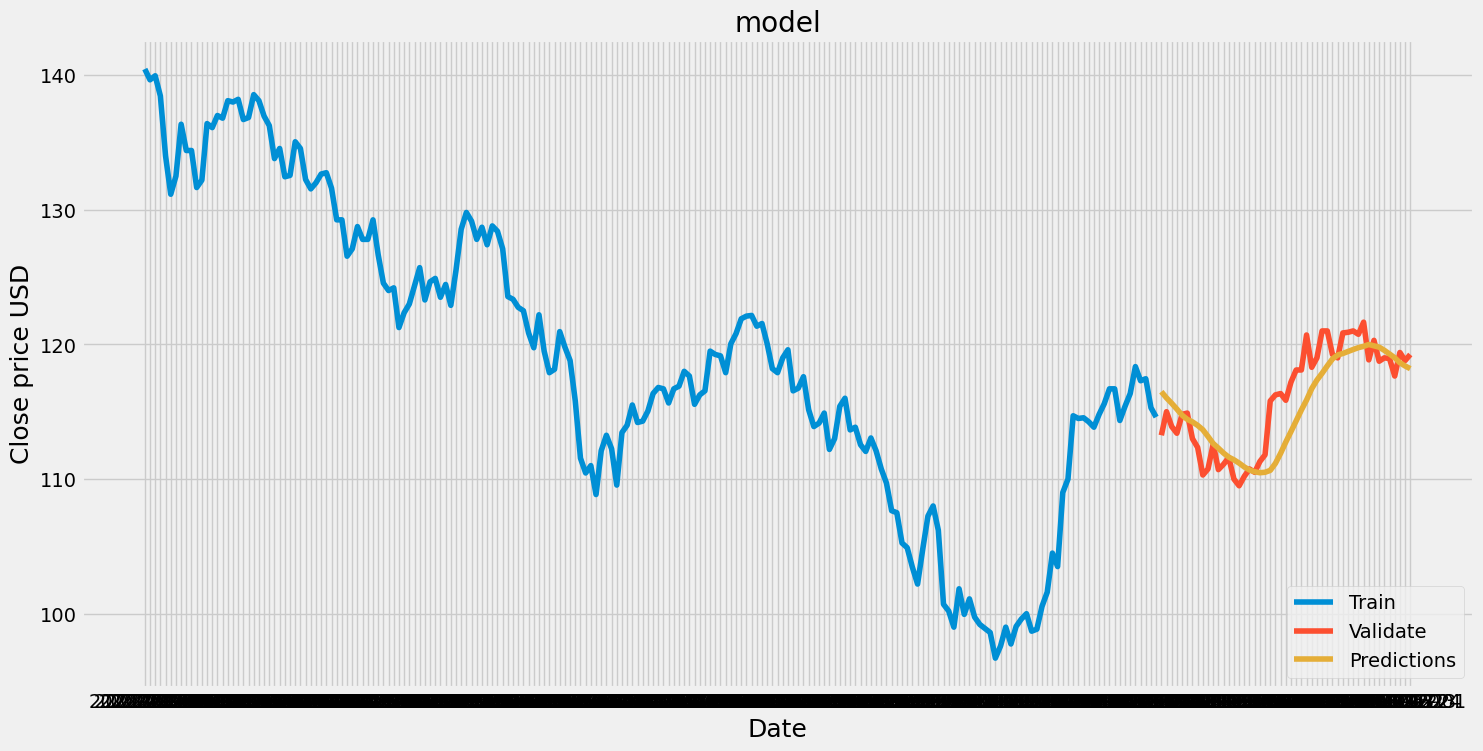

In [34]:
# plot the data
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validate', 'Predictions'], loc='lower right')
plt.show()

In [35]:
# show the valid and predicted price values
valid

,Close,Predictions
Date,,
2022-12-08,113.250000,116.486992
2022-12-09,115.000000,116.025841
2022-12-12,113.900002,115.625832
2022-12-13,113.400002,115.193840
2022-12-14,114.800003,114.741379
2022-12-15,114.900002,114.433243
2022-12-16,113.000000,114.243416
2022-12-19,112.349998,113.985909
2022-12-20,110.300003,113.663757


In [44]:
tw_0050_quote = pd.read_csv('0050.TW.csv')

# create the new dataframe
new_df = tw_0050_quote.filter(['Close'])
# get the last 60 days closing price values and convert the dataframe to array
last_60_days = new_df[:-60].values

In [45]:
# scale the data between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

In [46]:
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 1s 550ms/step
[[113.80563]]


In [49]:
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

n_days_to_predict = 14
predicted_prices = []

for i in range(n_days_to_predict):
    pred_price = model.predict(X_test)
    pred_price = scaler.inverse_transform(pred_price)
    predicted_prices.append(pred_price[0][0])

    last_60_days_scaled = np.append(last_60_days_scaled, pred_price, axis=0)[1:]
    X_test = np.reshape(last_60_days_scaled, (X_test.shape[0], X_test.shape[1], 1))

print(predicted_prices)


1/1 [==============================] - 0s 15ms/step
[196.45163, 220.22655, 235.14215, 244.51028, 250.40381, 254.09677, 256.3823, 257.76273, 258.56128, 258.98798, 259.1803, 259.22812, 259.19006, 259.10394]


In [51]:
predicted_prices

list

In [55]:
import pandas as pd

pred_df = pd.DataFrame({'Price': predicted_prices}, index=range(1, len(predicted_prices)+1))

pred_df

,Price
1,196.451630
2,220.226547
3,235.142151
4,244.510284
5,250.403809
6,254.096771
7,256.382294
8,257.762726
9,258.561279
10,258.987976


In [54]:
# Save the DataFrame to a CSV file
pred_df.to_csv('0050_stock_predict.csv', index=False)